## first-order lag system

Reference:  
[1] http://y373.sakura.ne.jp/minami/pyctrl  
[2] "Pythonによる制御工学入門(第1版)", 南裕樹, オーム社  
[3] "Control Engineering: MATLAB Exercies", Laszlo.K et al, Springer

Assuming the trolly that has a mass $M$ and friction coefficient $\mu$, the equation of motion is expressed as following:

$$ M\ddot{x} + \mu \dot{x} = f(t) $$

Let us set $z$ as $z = \dot{x}$, then we get:
$$ M\dot{z} + \mu{z} = f(t) $$

By doing Laplace-tranform on both sides, we get:
$$ sMZ(s) + \mu{Z(S)} = F(s) $$
$$ (sM + \mu)Z(s) = F(s) $$
$$ Z(s) = \frac{1}{sM + \mu} F(s)$$ 

Therefore, we now clearly see that the transfer function $H(s)$ is:
$$ H(s) = \frac{1}{sM + \mu} = \frac{\frac{1}{\mu}}{1 + \frac{M}{\mu} s} = \frac{K}{1+Ts}$$

We call this system "first order lag system."
Here we defined as:
$$ K = \frac{1}{\mu} : \rm{gain} $$
$$ T = \frac{M}{\mu} : \rm{time constant}$$
   
Let's take a look at how this system performs for step input.

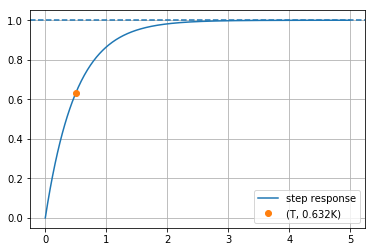

In [6]:
# import necessary library functions
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

T, K = 0.5, 1
num = [K]  # numerator of H(s)
den = [T, 1]  # denominator of H(s)
P = tf(num, den)
y, t = step(P, np.arange(0, 5, 0.01))
plt.plot(t, y, label="step response")
plt.plot(T, 0.632*K, "o", label="(T, 0.632K)")
plt.axhline(K, linestyle="--")
plt.legend()
plt.grid()
plt.show()

Notice that $y(\infty) = K = 1.0$. This can be easily proven by using final value theorem:
$$ y(\infty) = \lim_{t \to \infty}y(t) = \lim_{s \to 0}sY(s) \\
   y(\infty) = \lim_{s \to 0}\frac{K}{1+Ts} = K $$

But I will also show that $ y(\infty) = K $ by calculating the step response in the time domain.  

What is noteworthy is, furthermore, T equals to the value of $y(T) = 0.632K$. This means that lowering the value of T makes convergence of $y(t)$ faster.  

By the way, can we directly calculate the response $y(t)$ in the time domain? Yes, we just have to inverse laplace transform $Y(s)$. We can obtain the $y(t)$ represented in the "collective of basic forms of laplace transform", by partial fraction.  
$$ y(t) = \mathscr{L}^{-1}[Y(s)] = \mathscr{L}^{-1}[K(\frac{1}{s}-\frac{1}{s+1/T})] = K(1 - e^{\frac{-1}{T}t}) $$

Now obviously, $\lim_{t \to \infty}y(t) = K$. Actually, the plot of the step response for $y(t)$ matches exactly same as the abeve plot.

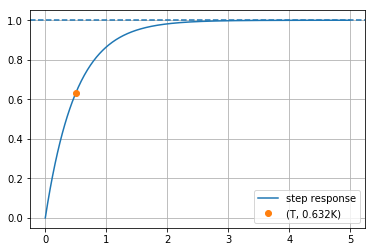

In [8]:
t = np.arange(0, 5, 0.01)
func = lambda t: K * (1 - np.exp(-1/T*t))
y = func(t)

plt.plot(t, y, label="step response")
plt.plot(T, 0.632*K, "o", label="(T, 0.632K)")
plt.axhline(K, linestyle="--")
plt.legend()
plt.grid()
plt.show()